# Linear Regression

## Matrices

- Bias가 Weight에 합쳐진 형태
\begin{equation*}
W = \begin{bmatrix}
\mathbf b \\
w_1 \\
w_2 \\
\vdots \\
w_n \\
\end{bmatrix}
X = \begin{bmatrix}
\mathbf 1 \\
x_1 \\
x_2 \\
\vdots \\
x_n \\
\end{bmatrix}
\end{equation*}

## Equations

\begin{align}
H(X) &= W^TX \\
cost(W) &= \frac 1 m \sum_i^m (H(X^{(i)})-Y^{(i)})^2 \\
W & := W - \alpha \frac \partial {\partial W} cost(W)
\end{align}

## Cost Function

- Convex 형태여야 Gradient descent로 학습할 수 있음

In [1]:
%pylab inline
import math
import numpy as np
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


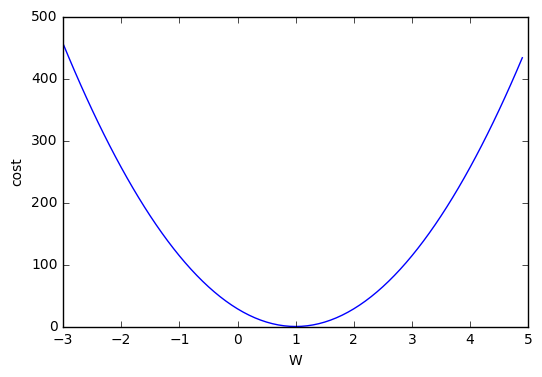

In [2]:
X = map(float, range(10))
Y = map(float, range(10))    # y = 1x
W = tf.placeholder(tf.float32)
H = tf.mul(X, W)
cost = tf.reduce_sum(tf.pow(H-Y, 2))/len(X)

init = tf.initialize_all_variables()
with tf.Session() as sess:
    sess.run(init)
    x, y = [], []
    for i in range(-30, 50):
        v = i * 0.1
        x.append(v)
        y.append(sess.run(cost, feed_dict={W: v}))
    pylab.plot(x, y)
    pylab.ylabel('cost')
    pylab.xlabel('W')

# Logistic Regression (Binary Classification)

- Linear regression의 값을 sigmoid 함수로 0~1 값으로 정규화한다
- 기존 cost function을 쓰면 convex 형태가 안나와서 새로운 cost를 씀

## Equations

\begin{align}
H(X) &= \frac 1 {1 + e^{-W^TX}} \\
cost(W) &= -\frac 1 m \sum_i^m y \log (H(x)) + (1-y) \log (1-H(x)) \\
W & := W - \alpha \frac \partial {\partial W} cost(W)
\end{align}

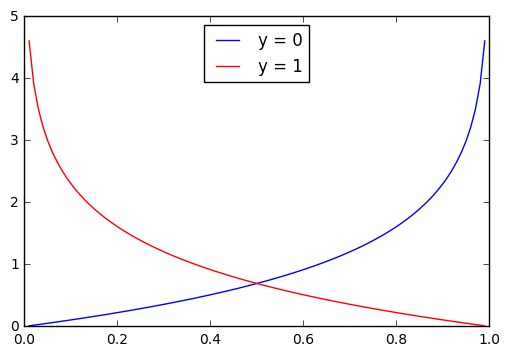

In [3]:
x, y0, y1 = [], [], []
for i in range(1, 100):
    v = i * 0.01
    x.append(v)
    y0.append(-math.log(1-v))
    y1.append(-math.log(v))
pylab.plot(x, y0, '-b', label='y = 0')
pylab.plot(x, y1, '-r', label='y = 1')
pylab.legend(loc='upper center')

# Softmax (Multinomial Logistic Regression)

- n개의 binary logistic classifier를 합친 개념
- Y는 one-hot 인코딩된 벡터로 표현
- Softmax로 output class간 0~1 확률을 계산
- Argmax로 최대 확률을 가지는 class를 선택

![](imgs/multiple_logistic_classifiers.png)

\begin{equation*}
\begin{bmatrix}
w_a1 & w_a2 & w_a3 \\
w_b1 & w_b2 & w_b3 \\
w_c1 & w_c2 & w_c3 \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\end{bmatrix}
=
\begin{bmatrix}
y_a \\
y_b \\
y_c \\
\end{bmatrix}
\end{equation*}

## Equations

- Softmax
- Cross-entropy (k classes)
\begin{align}
\sigma (y_i) &= \frac {e^{y_i}} {\sum_j e^{y_j}} \\
cost(H(x), y) &= -\sum_j^k y\log(H(x)) \\
cost(W) &= -\frac 1 m \sum_i^m \sum_j^k y\log(H(x))
\end{align}

# Appendix (Derivatives)

- Chain rule
\begin{align}
\frac d {dx} f(x) &= \lim_{\Delta x \to 0} \frac {f(x+\Delta x)-f(x)} {\Delta x} \\
\frac \partial {\partial x} f(g(x)) &= \frac {\partial f} {\partial g} \frac {\partial g} {\partial x}
\end{align}